    Statistical Tests: Part#2

# Homogennity Test:

- H0 = variances are equal
- H1 = variances are not equal

In [20]:
f_p = [100, 220, 240, 120, 80, 450, 100, 231, 330] # fruit price
m_p = [35000, 200000, 80000, 45000, 400000, 4000, 5500,15000] # mobile price

from scipy.stats import levene
s, p = levene(f_p, m_p)
print('Statistics=%.3f, p=%.3f' % (s, p))

sl = 0.01 #alpha
if p < sl:
    print("REJECT H0; variances are not equal ")
else:
    print("FAIL TO REJECT H0; variances are equal ")

Statistics=4.193, p=0.059
FAIL TO REJECT H0; variances are equal 


# Chi Square test:
Comparison/Relation b/w Categorical variables (both independent and dependent)

- H0 = Null hypothesis = The two categorical variables have no relationship (independent)
- H1 = Alternative hypothesis = There is a relationship (dependent) between two categorical variables

In [21]:
import pandas as pd
from scipy import stats
df = pd.read_csv("asiacup.csv")
df.head()

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
0,Pakistan,Sri Lanka,ODI,Sharjah,1984,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,2.0,Roy Dias,Lose
1,Sri Lanka,Pakistan,ODI,Sharjah,1984,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,3.0,Roy Dias,Win
2,India,Sri Lanka,ODI,Sharjah,1984,Win,Bowling,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,3.0,Surinder Khanna,Win
3,Sri Lanka,India,ODI,Sharjah,1984,Lose,Batting,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,0.0,Surinder Khanna,Lose
4,India,Pakistan,ODI,Sharjah,1984,Win,Batting,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,3.0,Surinder Khanna,Win


In [22]:
# checking null and duplicate values
df.isnull().sum().sort_values(ascending=False)


Sixes                        2
Run Rate                     2
Player Of The Match          2
Highest Individual wicket    2
Given Extras                 2
Wicket Taken                 2
Highest Score                2
Run Scored                   2
Wicket Lost                  2
Fours                        2
Avg Bat Strike Rate          2
Extras                       2
Team                         0
Opponent                     0
Selection                    0
Toss                         0
Year                         0
Ground                       0
Format                       0
Result                       0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Team                       254 non-null    object 
 1   Opponent                   254 non-null    object 
 2   Format                     254 non-null    object 
 3   Ground                     254 non-null    object 
 4   Year                       254 non-null    int64  
 5   Toss                       254 non-null    object 
 6   Selection                  254 non-null    object 
 7   Run Scored                 252 non-null    float64
 8   Wicket Lost                252 non-null    float64
 9   Fours                      252 non-null    float64
 10  Sixes                      252 non-null    float64
 11  Extras                     252 non-null    float64
 12  Run Rate                   252 non-null    float64
 13  Avg Bat Strike Rate        252 non-null    float64

In [26]:
# checking the relationship between winning the toss and winning the match
st, p, dof, e = stats.chi2_contingency(pd.crosstab(df['Toss'], df['Result']))
print("Chi-square statistic = ", st)
print("P-value = ", p)

#interpret the reult
alpha = 0.05
if p <= alpha:
    print('There is a relation between winning the toss and winning the match (reject H0)')
else:
    print('There is no relation between toss winning and match winning (fail to reject H0)')


Chi-square statistic =  262.1891815385128
P-value =  1.4785034600763978e-50
There is a relation between winning the toss and winning the match (reject H0)


# t-test:
- Independent sample t-test / 1 sample t-test
- Two sample t-test
  - Paired
  - Un-paired
- ANOVA
  - 1 way
  - 2 way
- MANOVA
  - 1 way
  - 2 way
- ANCOVA
- MANCOVA

In [27]:
# independent sample t test
# checking if the average no. of sixes in each match of the asia cup equal to 10

from scipy.stats import ttest_ind, ttest_1samp

stat, p = stats.ttest_1samp(df['Sixes'], 10)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Fail to reject H0; average no. of sixes in each match of the asia cup is equal to 10')
else:
    print('Reject H0; average no. of sixes in each match of the asia cup is not equal to 10')

    


Statistics=nan, p=nan
Reject H0; average no. of sixes in each match of the asia cup is not equal to 10


In [28]:
#delete all null values
df.dropna(inplace=True)

In [29]:
# checking null and duplicate values
df.isnull().sum().sort_values(ascending=False)


Team                         0
Opponent                     0
Player Of The Match          0
Highest Individual wicket    0
Given Extras                 0
Wicket Taken                 0
Highest Score                0
Avg Bat Strike Rate          0
Run Rate                     0
Extras                       0
Sixes                        0
Fours                        0
Wicket Lost                  0
Run Scored                   0
Selection                    0
Toss                         0
Year                         0
Ground                       0
Format                       0
Result                       0
dtype: int64

In [30]:
# independent sample t test
# checking if the average no. of sixes in each match of the asia cup equal to 10

from scipy.stats import ttest_ind

stat, p = stats.ttest_1samp(df['Sixes'], 10)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Fail to reject H0; average no. of sixes in each match of the asia cup is equal to 10')
else:
    print('Reject H0; average no. of sixes in each match of the asia cup is not equal to 10')

    


Statistics=-43.332, p=0.000
Reject H0; average no. of sixes in each match of the asia cup is not equal to 10


In [31]:
# unpaired t test on fours and sixes
# checking if the average no. of fours and sixes in each match of the asia cup are equal

from scipy.stats import ttest_ind

stat, p = stats.ttest_ind(df['Fours'], df['Sixes'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Fail to reject H0; average no. of fours and sixes in each match of the asia cup are equal')
else:
    print('Reject H0; average no. of fours and sixes in each match of the asia cup are not equal')

Statistics=24.680, p=0.000
Reject H0; average no. of fours and sixes in each match of the asia cup are not equal


In [32]:
#paired t test on data before and after the medicne blood pressure
# checking if the average blood pressure before and after the medicine are equal

from scipy.stats import ttest_rel

# Sample data
before_med = [100, 121, 30, 47, 59, 99, 130]
after_med = [90, 110, 40, 57, 50, 90, 120]

# Perform the t-test
t_stat, p_value = ttest_rel(before_med, after_med)

print("p-value: ", p_value)

#interret results
alpha = 0.05
if p_value > alpha:
    print('Sample means are equal (fail to reject H0)')
else:
    print('Sample means are not equal (reject H0)')


p-value:  0.3009601090833767
Sample means are equal (fail to reject H0)


## ANOVA:
- 1-way: 1 factor and 1 response variable.
e.g., We want to kow the **Datathon scores** of **three different education levels** ( Intermediate, Bachelors, Masters). So, here Factor *(Categorical)* = Levels of Education ( Intermediate, Bachelors, Masters ) & Response = Datathon Score *(Continuous)*

- 2-way: 2 factors and 1 response variable. e.g., Factors: Level of Education + Age groups ( teen, adult, elder)

- ANCOVA: 1 factor + 1 covariate + 1 response variable e.g., Covariate: No. of hours spent working ( CONTINUOUS)

- MANOVA: In 1 way we have 1 factor, 2 response variables ( Datathon scores + Salary ) and in 2 way we have 2 factors and 2 response variables.

- MANCOVA: Same like MANOVA but addition of COVAIRATE.

In [ ]:
import scipy.stats as stats

# Sample data for three groups
group1 = [1, 2, 3, 4, 5]
group2 = [2, 3, 4, 5, 6]
group3 = [3, 4, 5, 6, 7]

# Perform ANOVA
f_val, p_val = stats.f_oneway(group1, group2, group3)

# Print the results
print("F-value:", f_val)
print("p-value:", p_val)

#interpret results
alpha = 0.05
if p_val > alpha:
    print('Sample means are equal (fail to reject H0)')
else:
    print('Sample means are not equal (reject H0)')

    


# Correlation: -1 to 1 (0% and 100%)
1. Correlation ( pearson, etc)
2. Regression 


- -ve = -1 to 0 : INVERSE
- +ve = 0 to 1 : DIRECT
- ABSOLUTE: corr = 0.5 < WEAK RELATION 



In [35]:
# #coorealation of tips data from seaborn
import seaborn as sns
tips = sns.load_dataset('tips')

# tips.corr()

In [38]:

# Select only the numerical columns for correlation analysis
numerical_columns = tips.select_dtypes(include=['number'])

# Calculate correlations for the numerical columns
correlation_matrix = numerical_columns.corr()

# Print the correlation matrix
print(correlation_matrix)


            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<Axes: >

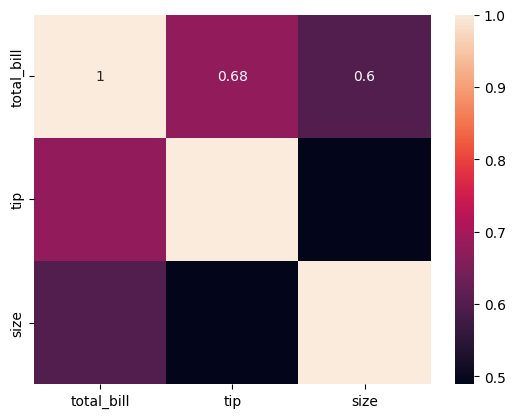

In [40]:
sns.heatmap(correlation_matrix, annot=True)